In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
%matplotlib inline

In [2]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Simple Regression Models'

In [5]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\ConsumerPriceIndex.csv')
df.head()

,Series reference,Period,Initially_published,Revised
0,CPIQ.SE907303,2017.03,1170.192308,1172
1,CPIQ.SE907303,2017.06,1000.000000,1000
2,CPIQ.SE907303,2017.09,1040.384615,1021
3,CPIQ.SE907303,2017.12,1105.000000,1111
4,CPIQ.SE907303,2018.03,1124.000000,1117


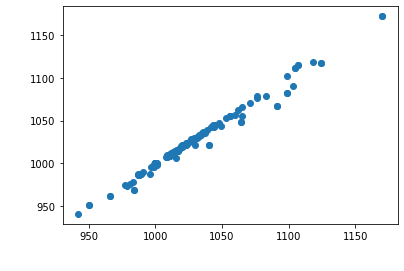

In [8]:
plt.scatter(df.Initially_published,df.Revised)
plt.xlabel("Initially published",color='white',size=20)
plt.ylabel("Revised",color='white',size=20)
plt.show()

In [9]:
msk=np.random.rand(len(df))<0.3
train=df[msk]
test=df[~msk]

In [11]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Initially_published']])
train_y=np.asanyarray(train[['Revised']])
regr.fit(train_x,train_y)
print("The Coefficient is : ",regr.coef_[0][0])
print("The Intercept is : ",regr.intercept_[0])

The Coefficient is :  0.9364253946137527
The Intercept is :  63.93373312931885


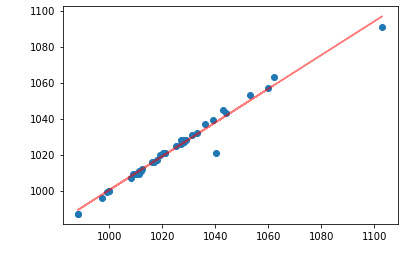

In [20]:
plt.scatter(train.Initially_published,train.Revised)
plt.plot(train_x,train_x*regr.coef_[0][0]+regr.intercept_[0],color='red',alpha=0.5)
plt.xlabel("Initially Published",color='white',size=20)
plt.ylabel("Revised",color='white',size=20)
plt.show()

In [18]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['Initially_published']])
test_y=np.asanyarray(test[['Revised']])
test_y_hat=regr.predict(test_x)
print("The MAE is : %.2f " %np.mean(np.absolute(test_y_hat-test_y)))
print("The MSE is : %.2f" %np.mean((test_y_hat-test_y)**2))
print("The Accuracy score is : %.2f " %r2_score(test_y_hat,test_y))

The MAE is : 3.52 
The MSE is : 34.10
The Accuracy score is : 0.98 
